# Spatial Spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from spatial_spectrum import SpatialSpectrum

## Load Data 
The simulated raw radar IF signals.
20 Tx * 20 Rx, one chirp, 256 samples per chirp.  (Vayyar TrigB radar)

In [2]:
sig = np.load("data/human_sig.npy")
sig=torch.tensor(sig,requires_grad=True,device='cuda')
print(sig.shape)

torch.Size([20, 20, 1, 256])


## Process Spatial Spectrum

In [3]:
SpatialSpectrumGen= SpatialSpectrum()
spect3D = SpatialSpectrumGen.radar_image(sig)

## Visualization

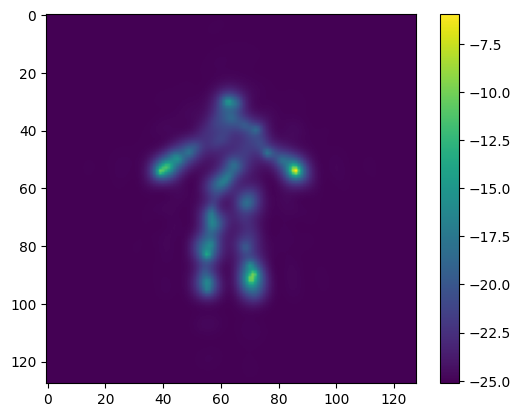

In [4]:
image =spect3D.sum(dim=2).cpu()
plt.imshow(np.rot90(20 * torch.log10(torch.abs(image).detach().cpu()),3))
plt.colorbar()

## Backpropagation

In [5]:
loss = torch.sum(torch.abs(spect3D))
loss.backward()


Normally, the gradient can be backpropagated through the spatial spectrum algorithm.

But the local non-convexity problem still exist, so we developed a spatial spectrum surrogate

## Check Gradients

In [6]:
print(sig.grad)

tensor([[[[  -4392.9047-2.9403e+04j,   27035.7509-2.0639e+04j,
             34654.3215+1.6874e+04j,  ...,
             -1553.1200+2.2978e+04j,  -20091.5632+1.2705e+04j,
            -24036.2020-1.0280e+04j]],

         [[ -23842.9035+9.8063e+03j,  -17249.6550-1.8004e+04j,
              9775.4785-2.1514e+04j,  ...,
             16482.1141-1.9224e+04j,   24457.8381+8.7878e+03j,
               549.1072+2.6133e+04j]],

         [[ -42698.3452+7.7131e+04j,  -85957.4858-1.0482e+04j,
            -22095.1151-8.0764e+04j,  ...,
              6569.2623-8.4407e+04j,   83220.8658-2.6019e+04j,
             55806.8491+6.8515e+04j]],

         ...,

         [[  30412.1025+7.3976e+04j,  -53527.3017+6.4768e+04j,
            -86357.3484-1.8966e+04j,  ...,
            -30119.8626-6.7256e+04j,   43935.1417-6.0239e+04j,
             76210.4862+8.7784e+03j]],

         [[  10819.8245+1.4292e+04j,   -7815.8757+1.6982e+04j,
            -19459.4321+8.5832e+02j,  ...,
            -10312.0025-1.3225e+04j,    626